In [1]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=c75d66c7413c53eb1c6f82bbf1e37036e1dd3dce6e53421d9e915f8ae4f0e2e2
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [2]:
pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173916 sha256=651243dfca2b0a70f9785571d11a5a0cee5da91837ab50d08476ea6db13fb418
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


# data collection and preprocessing

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import ta



In [4]:
url = 'https://drive.google.com/file/d/1m83tbIIf_4nrfu1uHG9VT58d2wHdQxRP/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id='+file_id
df = pd.read_csv(dwn_url)
#df = pd.read_csv('/content/btc_4h.csv', parse_dates=["datetime"])

In [5]:
df

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13410.03,1676.204807
1,2018-01-01 09:30:00,13434.98,13818.55,13322.15,13570.35,1302.214836
2,2018-01-01 13:30:00,13569.98,13735.24,13001.13,13220.56,1319.755931
3,2018-01-01 17:30:00,13220.56,13330.00,12750.00,13247.00,1831.933153
4,2018-01-01 21:30:00,13247.00,13290.65,12940.00,13240.37,1092.337234
...,...,...,...,...,...,...
8926,2022-01-30 13:30:00,38244.98,38359.26,37795.00,38110.02,4712.873740
8927,2022-01-30 17:30:00,38110.03,38153.82,37712.05,37980.09,2934.129800
8928,2022-01-30 21:30:00,37977.47,38074.76,37442.52,37512.37,3351.248670
8929,2022-01-31 01:30:00,37512.37,38230.00,37351.63,37881.76,4375.453430


In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])
type(df['datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
df.isnull().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

<Axes: xlabel='datetime', ylabel='close'>

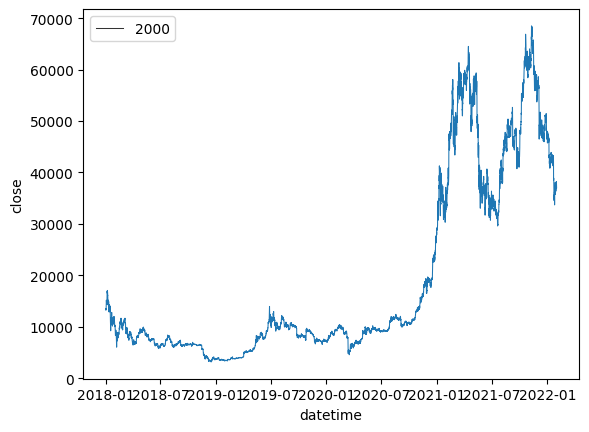

In [8]:
sns.lineplot(data = df, x = 'datetime', y = 'close', size = 2000)

#  technical analysis

## simple moving average

In [9]:
df['20MA'] = df['close'].rolling(window=20).mean()
df['100MA'] = df['close'].rolling(window=40).mean()

In [10]:
stock_symbol = 'BTC-USD'
start_date = '2023-01-01'
end_date = '2024-01-01'

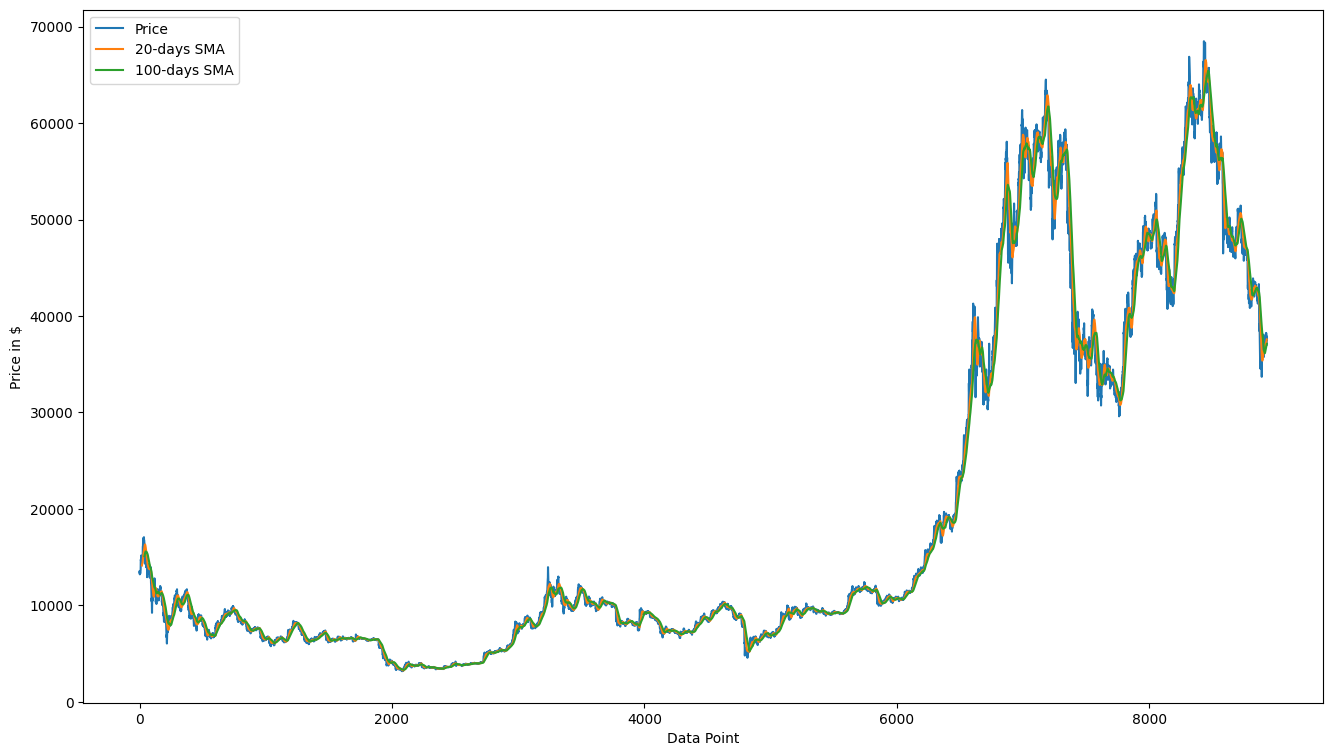

In [11]:
#plotting sma

fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(df.index, df['close'], label='Price')
ax.plot(df.index, df['20MA'], label='20-days SMA')
ax.plot(df.index, df['100MA'], label='100-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.set_xlabel('Data Point')

plt.show()

In [13]:
df.tail(10)

,datetime,open,high,low,close,volume,20MA,100MA
8921,2022-01-29 17:30:00,37736.06,38198.82,37268.44,37566.82,6404.92320,37133.0615,36508.01175
8922,2022-01-29 21:30:00,37567.98,37950.00,37317.37,37853.00,3330.83069,37122.0730,36578.06175
8923,2022-01-30 01:30:00,37853.00,38720.74,37816.21,38166.84,6030.72394,37131.1650,36642.95300
8924,2022-01-30 05:30:00,38166.83,38281.24,37737.49,37917.13,3377.96921,37148.0265,36698.72400
8925,2022-01-30 09:30:00,37917.13,38300.00,37901.17,38244.98,2678.99042,37219.8085,36772.65900
8926,2022-01-30 13:30:00,38244.98,38359.26,37795.00,38110.02,4712.87374,37338.0245,36856.02325
8927,2022-01-30 17:30:00,38110.03,38153.82,37712.05,37980.09,2934.12980,37428.3355,36899.41175
8928,2022-01-30 21:30:00,37977.47,38074.76,37442.52,37512.37,3351.24867,37469.9550,36953.76450
8929,2022-01-31 01:30:00,37512.37,38230.00,37351.63,37881.76,4375.45343,37532.0715,37028.58825
8930,2022-01-31 05:30:00,37881.75,37951.07,36632.61,37025.68,7138.36907,37572.8955,37111.80250


In [15]:
df['Signal_SMA'] = 0
df.head(10)

,datetime,open,high,low,close,volume,20MA,100MA,Signal_SMA
0,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13410.03,1676.204807,NaN,NaN,0
1,2018-01-01 09:30:00,13434.98,13818.55,13322.15,13570.35,1302.214836,NaN,NaN,0
2,2018-01-01 13:30:00,13569.98,13735.24,13001.13,13220.56,1319.755931,NaN,NaN,0
3,2018-01-01 17:30:00,13220.56,13330.00,12750.00,13247.00,1831.933153,NaN,NaN,0
4,2018-01-01 21:30:00,13247.00,13290.65,12940.00,13240.37,1092.337234,NaN,NaN,0
5,2018-01-02 01:30:00,13222.03,13599.70,13222.03,13380.00,1387.469883,NaN,NaN,0
6,2018-01-02 05:30:00,13382.16,13850.00,13231.96,13353.78,2365.532926,NaN,NaN,0
7,2018-01-02 09:30:00,13353.78,13480.84,12890.02,13343.00,2980.316053,NaN,NaN,0
8,2018-01-02 13:30:00,13343.01,13617.28,13302.59,13490.00,2596.182674,NaN,NaN,0
9,2018-01-02 17:30:00,13490.00,13894.86,13450.46,13690.03,3365.879508,NaN,NaN,0


In [26]:
df['20MA'][40] = 16126.288
df['20MA'][40]

<ipython-input-26-6da53c7304d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['20MA'][40] = 16126.288


16126.288

In [20]:
# Create signals
def sma_strategy(df):
    short_window=20
    long_window=40
    for i in range(long_window,len(df)):
        if df['20MA'][i]>df['100MA'][i] and df['20MA'][i-1]<df['100MA'][i-1]:
            df['Signal_SMA'][i] = 1
        elif df['20MA'][i]<df['100MA'][i] and df['20MA'][i-1]>df['100MA'][i-1]:
            df['Signal_SMA'][i] = -1
    return df

In [27]:
df = sma_strategy(df)
df

<ipython-input-20-3fa0bbbdc818>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal_SMA'][i] = -1
<ipython-input-20-3fa0bbbdc818>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal_SMA'][i] = 1


,datetime,open,high,low,close,volume,20MA,100MA,Signal_SMA
0,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13410.03,1676.204807,NaN,NaN,0
1,2018-01-01 09:30:00,13434.98,13818.55,13322.15,13570.35,1302.214836,NaN,NaN,0
2,2018-01-01 13:30:00,13569.98,13735.24,13001.13,13220.56,1319.755931,NaN,NaN,0
3,2018-01-01 17:30:00,13220.56,13330.00,12750.00,13247.00,1831.933153,NaN,NaN,0
4,2018-01-01 21:30:00,13247.00,13290.65,12940.00,13240.37,1092.337234,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
8926,2022-01-30 13:30:00,38244.98,38359.26,37795.00,38110.02,4712.873740,37338.0245,36856.02325,0
8927,2022-01-30 17:30:00,38110.03,38153.82,37712.05,37980.09,2934.129800,37428.3355,36899.41175,0
8928,2022-01-30 21:30:00,37977.47,38074.76,37442.52,37512.37,3351.248670,37469.9550,36953.76450,0
8929,2022-01-31 01:30:00,37512.37,38230.00,37351.63,37881.76,4375.453430,37532.0715,37028.58825,0


In [ ]:
#backtesting the strategy

In [ ]:
!pip install backtrader


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 5.5 MB/s eta 0:00:00


In [ ]:
import backtrader as bt
import pandas as pd
from ta.trend import SMAIndicator

class SMAStrategy(bt.Strategy):
    params = (
        ("short_period", 20),
        ("long_period", 50),
        ("rsi_period", 14),
        ("rsi_overbought", 70),
        ("rsi_oversold", 30),
    )

    def __init__(self):
        self.short_sma = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.short_period)
        self.long_sma = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.long_period)
        self.rsi = bt.indicators.RelativeStrengthIndex(period=self.params.rsi_period)

    def next(self):
        if self.short_sma > self.long_sma and self.rsi < self.params.rsi_oversold:
            self.buy()

        elif self.short_sma < self.long_sma or self.rsi > self.params.rsi_overbought:
            self.sell()

def run_backtest(data):
    cerebro = bt.Cerebro()

    # Add the data
    cerebro.adddata(data)

    # Add the strategy
    cerebro.addstrategy(SMAStrategy)

    # Set initial cash
    cerebro.broker.set_cash(10000)

    # Set commission
    cerebro.broker.setcommission(commission=0.001)

    # Print starting cash
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run the strategy
    cerebro.run()

    # Print final cash
    print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())

if __name__ == '__main__':
    # Load Bitcoin price data
    data = pd.read_csv('/content/btc_4h.csv', parse_dates=["datetime"])
    data = pd.DataFrame(data)
    data["date"] = pd.to_datetime(data["datetime"]).dt.date
    data["time"] = pd.to_datetime(data["datetime"]).dt.time
    data = data.set_index("datetime", verify_integrity=True)


    # Create a backtrader data feed
    data_feed = bt.feeds.PandasData(dataname=data)

    # Run the backtest
    run_backtest(data_feed)


Starting Portfolio Value: 10000.00
Ending Portfolio Value: -89797063.11


In [ ]:
from backtesting import Strategy
from backtesting import Backtest
import backtesting
'''
class SMA_Strategy(Strategy):
  def init(self):
    super().init()
    self.signal1 = self.I(SIGNAL)
  def next(self):
    super().next()
    if self.signal1==1.0 and len(self.trades)==0:
      self.buy()
    elif self.signal1==-1.0 and len(self.trades)==0:
      self.sell()
bt = Backtest(df,SMA_Strategy,cash = 10000000,margin=1/10,commission=0.002)
stat = bt.run()
stat
'''



/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


'\nclass SMA_Strategy(Strategy):\n  def init(self):\n    super().init()\n    self.signal1 = self.I(SIGNAL)\n  def next(self):\n    super().next()\n    if self.signal1==1.0 and len(self.trades)==0:\n      self.buy()\n    elif self.signal1==-1.0 and len(self.trades)==0:\n      self.sell()\nbt = Backtest(df,SMA_Strategy,cash = 10000000,margin=1/10,commission=0.002)\nstat = bt.run()\nstat\n'

In [ ]:
# Generate trading orders
df['Position'] = df['Signal_SMA'].diff()

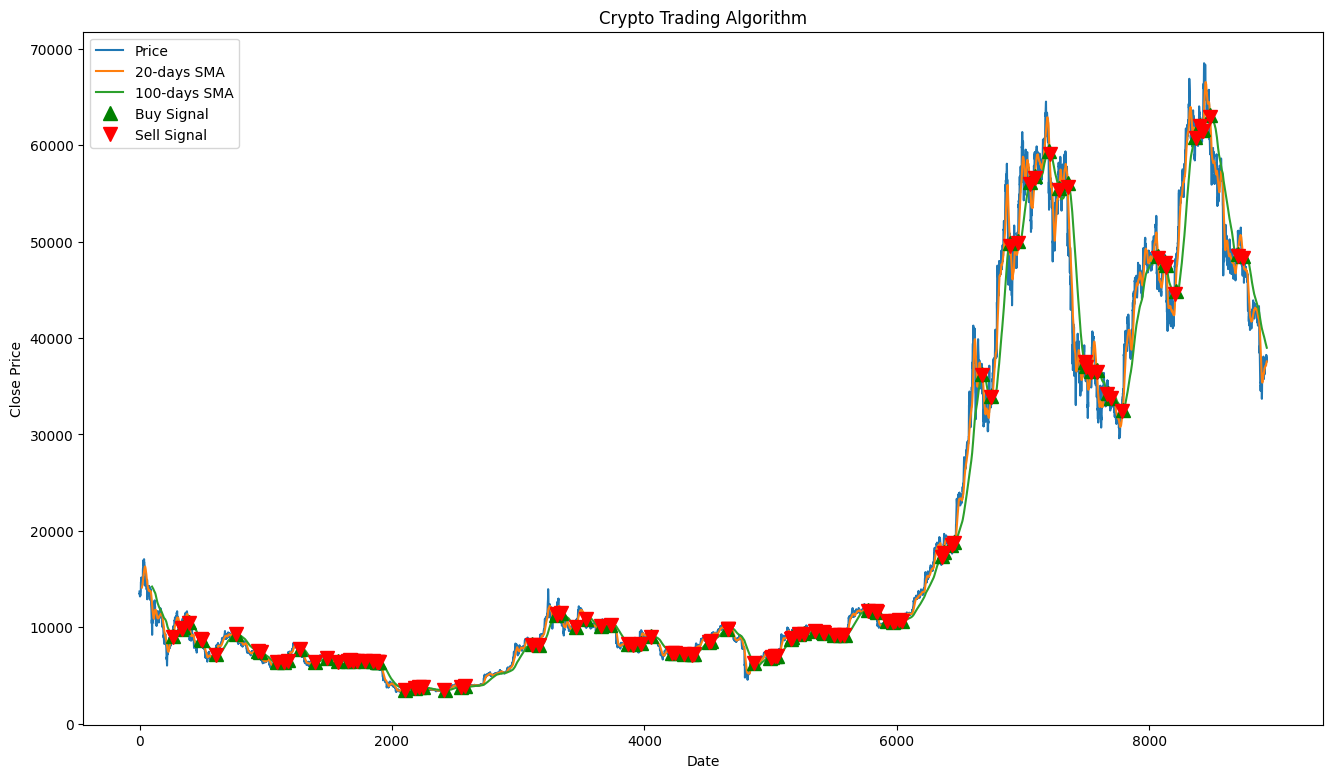

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(df.index, df['open'], label='Price')
ax.plot(df.index, df['20MA'], label='20-days SMA')
ax.plot(df.index, df['100MA'], label='100-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.set_xlabel('Data Point')

# Buy signals
plt.plot(df[df['Position'] == 1.0].index,
         df['20MA'][df['Position'] == 1.0],
         '^', markersize=10, color='g', label='Buy Signal')

# Sell signals
plt.plot(df[df['Position'] == -1.0].index,
         df['20MA'][df['Position'] == -1.0],
         'v', markersize=10, color='r', label='Sell Signal')

plt.title('Crypto Trading Algorithm')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

##bollinger bands


In [ ]:
from ta.volatility import BollingerBands

In [ ]:
indicator_bb = BollingerBands(close=df["close"], window=20, window_dev=2)

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

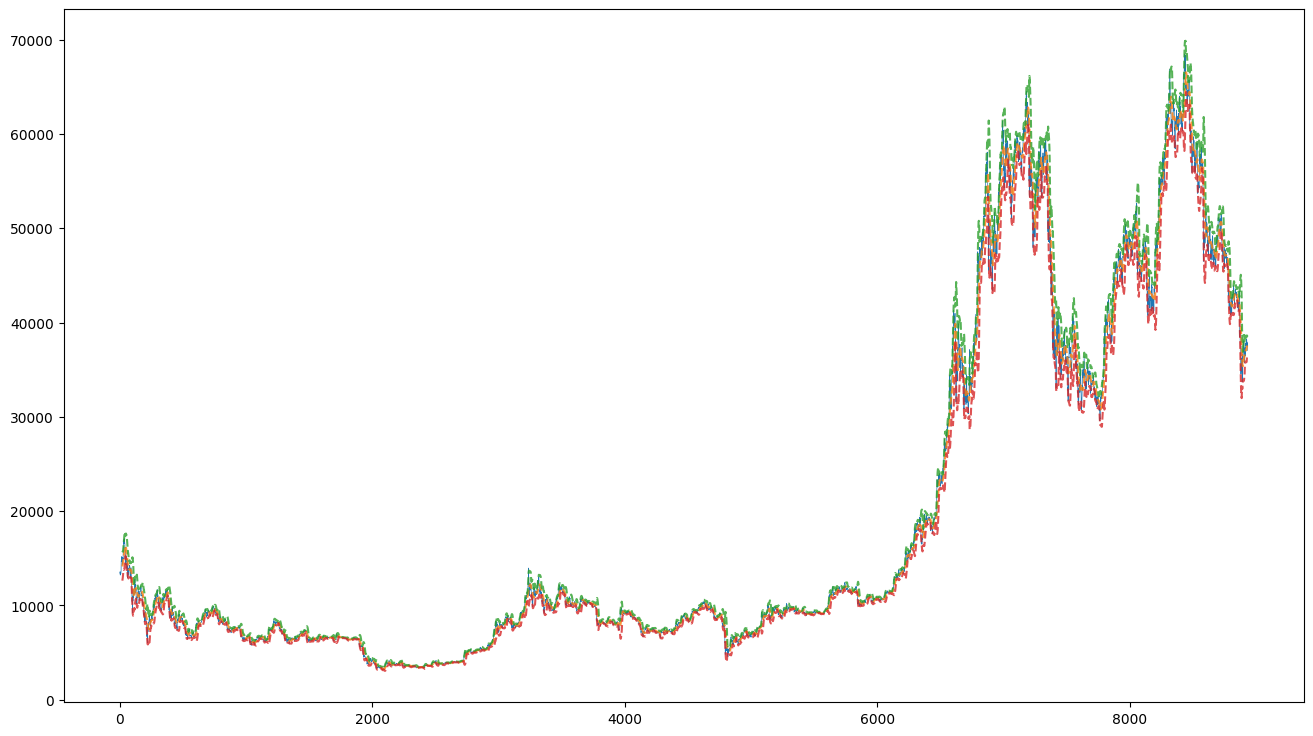

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(df['close'], label='Close Price', linewidth=0.5)
plt.plot(df['bb_bbm'], label='Bollinger Middle Band', linestyle='--', alpha=0.8)
plt.plot(df['bb_bbh'], label='Bollinger Upper Band', linestyle='--', alpha=0.8)
plt.plot(df['bb_bbl'], label='Bollinger Lower Band', linestyle='--', alpha=0.8)


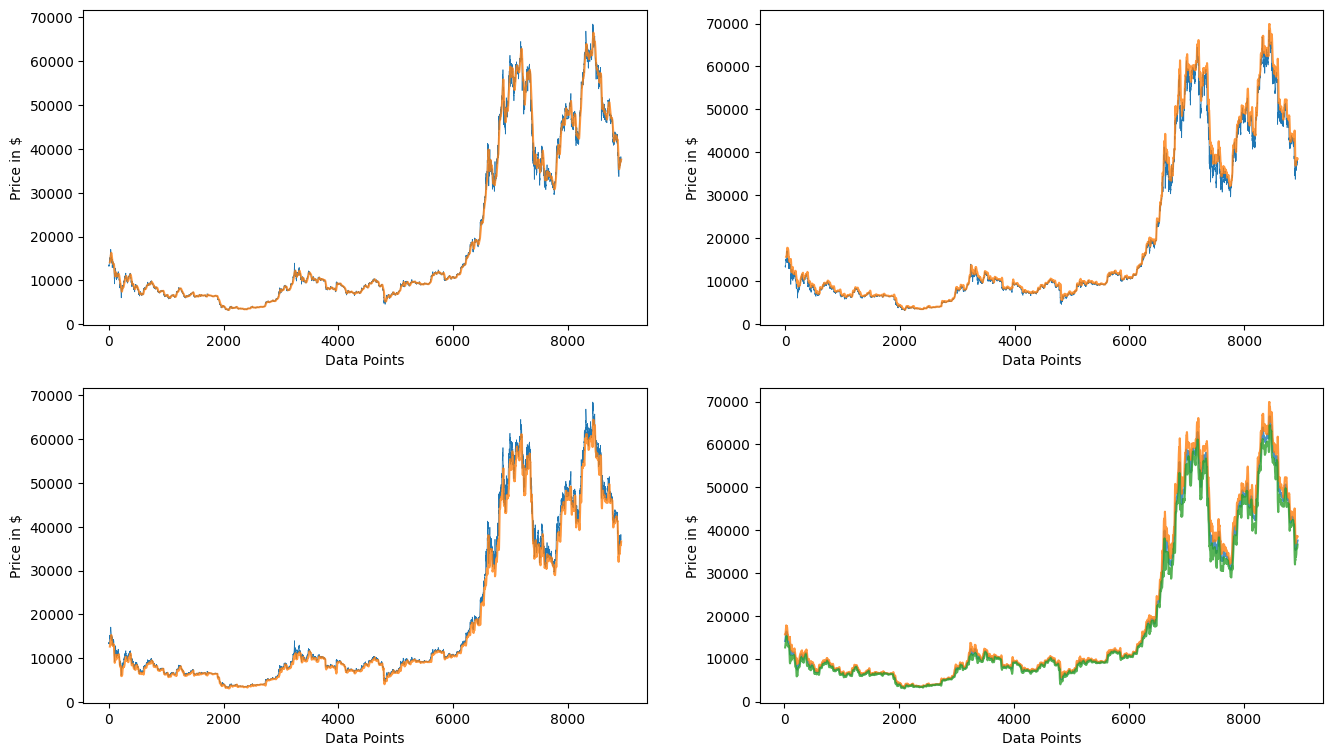

In [ ]:
plt.figure(figsize=(16, 9))


plt.subplot(2,2,1)
l1=plt.plot(df['close'], linewidth=0.5, label='Close Price')
l2=plt.plot(df['bb_bbm'], alpha=0.8, label='Bollinger Middle Band')
plt.xlabel('Data Points')
plt.ylabel('Price in $')


plt.subplot(2,2,2)
plt.plot(df['close'], label='Close Price', linewidth=0.5)
plt.plot(df['bb_bbh'], label='Bollinger Upper Band', alpha=0.8)
plt.xlabel('Data Points')
plt.ylabel('Price in $')

plt.subplot(2,2,3)
plt.plot(df['close'], label='Close Price', linewidth=0.5)
plt.plot(df['bb_bbl'], label='Bollinger Lower Band', alpha=0.8)
plt.xlabel('Data Points')
plt.ylabel('Price in $')

plt.subplot(2,2,4)
plt.plot(df['bb_bbm'], label='Bollinger Middle Band', alpha=0.8)
plt.plot(df['bb_bbh'], label='Bollinger Upper Band', alpha=0.8)
plt.plot(df['bb_bbl'], label='Bollinger Lower Band', alpha=0.8)
plt.xlabel('Data Points')
plt.ylabel('Price in $')
plt.savefig("bb.png")


In [ ]:
def bb_strategy():
    df['Signal_BB'] = np.where(df['close'] < df['bb_bbl'].values, 1.0, 0.0)
    df.loc[df['close'] > df['bb_bbl'].values, 'Signal_BB'] = -1.0

bb_strategy()

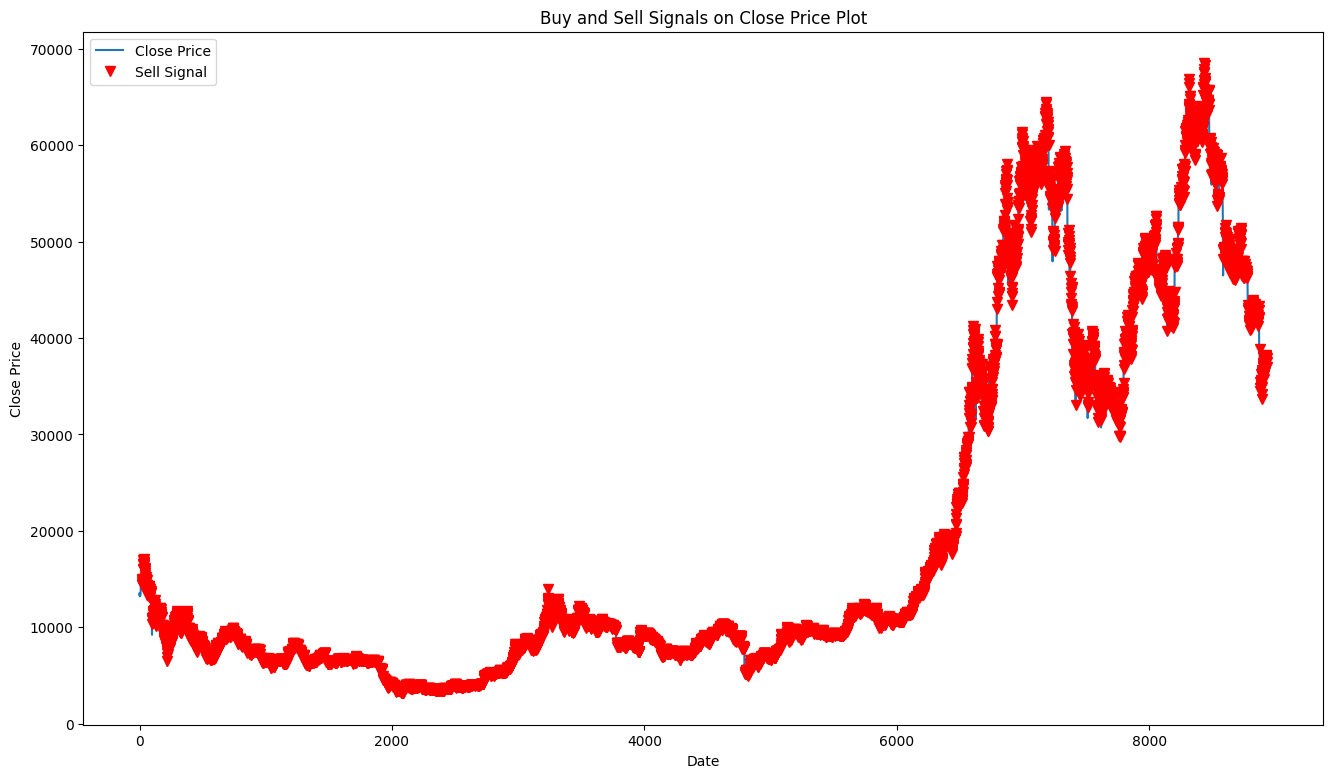

In [ ]:
buy_signals = df[df['Signal_BB'] == 1.0]
sell_signals = df[df['Signal_BB'] == -1.0]

plt.figure(figsize=(16,9))

plt.plot(df.index, df['close'], label='Close Price')
#plt.plot(buy_signals.index, buy_signals['close'], '^', markersize=7, color='g', label='Buy Signal')
plt.plot(sell_signals.index, sell_signals['close'], 'v', markersize=7, color='r', label='Sell Signal')

plt.title('Buy and Sell Signals on Close Price Plot')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.show()

##moving average convergence/divergence (macd)

In [ ]:
macd_object = ta.trend.MACD(df['close'])
df['MACD'] = macd_object.macd()
df['MACD_Signal'] = macd_object.macd_signal()
df['MACD_Diff'] = macd_object.macd_diff()
df.tail()

,datetime,open,high,low,close,volume,20MA,100MA,Signal_SMA,Position,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli,Signal_BB,MACD,MACD_Signal,MACD_Diff
8926,2022-01-30 13:30:00,38244.98,38359.26,37795.00,38110.02,4712.87374,37338.0245,39184.4885,0.0,0.0,37338.0245,38616.151465,36059.897535,0.0,0.0,-1.0,333.514908,243.003502,90.511406
8927,2022-01-30 17:30:00,38110.03,38153.82,37712.05,37980.09,2934.12980,37428.3355,39138.6883,0.0,0.0,37428.3355,38616.772588,36239.898412,0.0,0.0,-1.0,326.231293,259.649060,66.582233
8928,2022-01-30 21:30:00,37977.47,38074.76,37442.52,37512.37,3351.24867,37469.9550,39087.5733,0.0,0.0,37469.9550,38607.873780,36332.036220,0.0,0.0,-1.0,279.496025,263.618453,15.877571
8929,2022-01-31 01:30:00,37512.37,38230.00,37351.63,37881.76,4375.45343,37532.0715,39039.7908,0.0,0.0,37532.0715,38616.224454,36447.918546,0.0,0.0,-1.0,269.161942,264.727151,4.434791
8930,2022-01-31 05:30:00,37881.75,37951.07,36632.61,37025.68,7138.36907,37572.8955,38989.9182,0.0,0.0,37572.8955,38505.638713,36640.152287,0.0,0.0,-1.0,189.706784,249.723078,-60.016294


In [ ]:
def macd_strategy():
    df['Signal_MACD'] = 0
    df.loc[(df['MACD'] > df['MACD_Signal']) | (df['MACD_Diff'] > 0), 'Signal_MACD'] = 1
    df.loc[(df['MACD'] < df['MACD_Signal']), 'Signal_MACD'] = -1



In [ ]:
df

,datetime,open,high,low,close,volume,20MA,100MA,Signal_SMA,Position,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli,Signal_BB,MACD,MACD_Signal,MACD_Diff
0,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13410.03,1676.204807,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
1,2018-01-01 09:30:00,13434.98,13818.55,13322.15,13570.35,1302.214836,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2,2018-01-01 13:30:00,13569.98,13735.24,13001.13,13220.56,1319.755931,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
3,2018-01-01 17:30:00,13220.56,13330.00,12750.00,13247.00,1831.933153,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
4,2018-01-01 21:30:00,13247.00,13290.65,12940.00,13240.37,1092.337234,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8926,2022-01-30 13:30:00,38244.98,38359.26,37795.00,38110.02,4712.873740,37338.0245,39184.4885,0.0,0.0,37338.0245,38616.151465,36059.897535,0.0,0.0,-1.0,333.514908,243.003502,90.511406
8927,2022-01-30 17:30:00,38110.03,38153.82,37712.05,37980.09,2934.129800,37428.3355,39138.6883,0.0,0.0,37428.3355,38616.772588,36239.898412,0.0,0.0,-1.0,326.231293,259.649060,66.582233
8928,2022-01-30 21:30:00,37977.47,38074.76,37442.52,37512.37,3351.248670,37469.9550,39087.5733,0.0,0.0,37469.9550,38607.873780,36332.036220,0.0,0.0,-1.0,279.496025,263.618453,15.877571
8929,2022-01-31 01:30:00,37512.37,38230.00,37351.63,37881.76,4375.453430,37532.0715,39039.7908,0.0,0.0,37532.0715,38616.224454,36447.918546,0.0,0.0,-1.0,269.161942,264.727151,4.434791


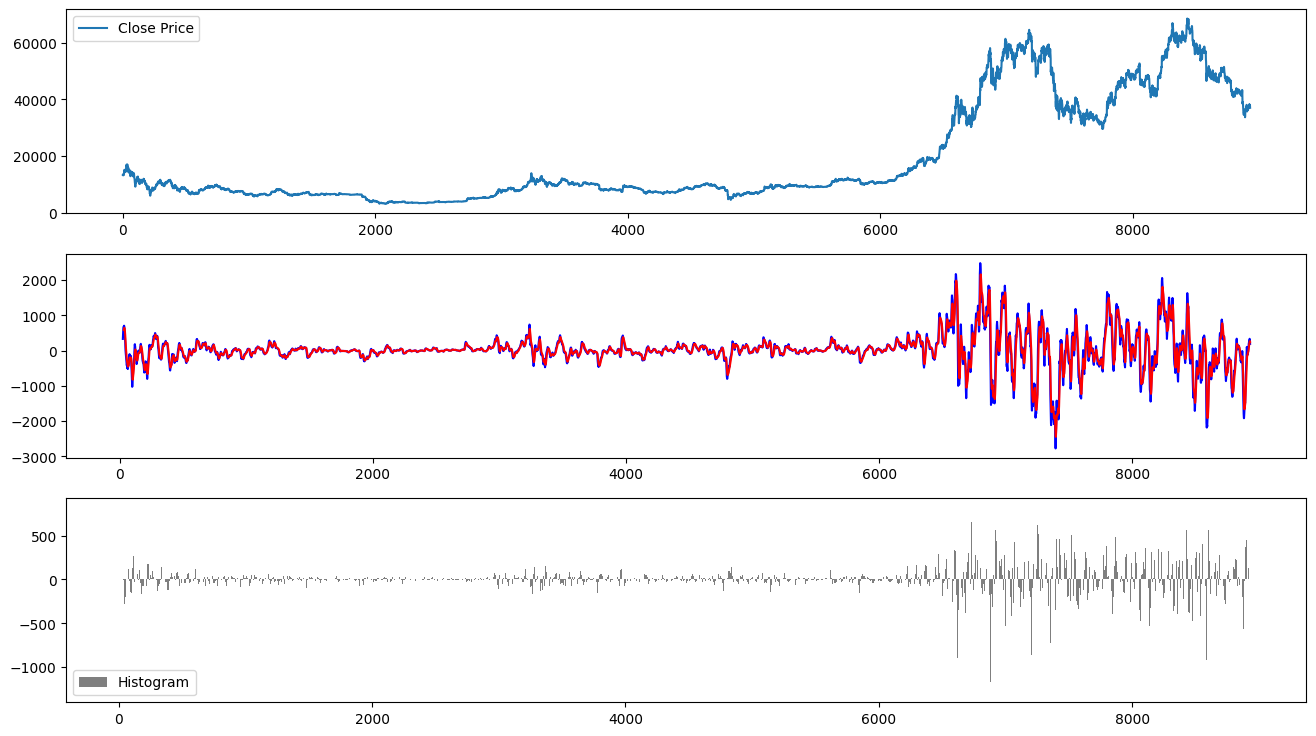

In [ ]:
# Plotting
plt.figure(figsize=(16,9))

# Plotting Close Price
plt.subplot(3, 1, 1)
plt.plot(df['close'], label='Close Price')

plt.legend()

# Plotting MACD
plt.subplot(3, 1, 2)
plt.plot(df['MACD'], label='MACD Line', color='blue')
plt.plot(df['MACD_Signal'], label='Signal Line', color='red')

plt.subplot(3,1,3)
plt.bar(df.index, df['MACD_Diff'], label='Histogram', color='black', alpha=0.5)
plt.legend()

plt.show()

## relative strength index

In [ ]:
from ta.momentum import RSIIndicator


In [ ]:
df['RSI'] = RSIIndicator(df.close, 14).rsi()
df['RSI'].fillna(0, inplace=True)
df['RSI'] = df['RSI'].astype(int)

In [ ]:

print(df.dtypes)

datetime       datetime64[ns]
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
20MA                  float64
100MA                 float64
Signal_SMA            float64
Position              float64
bb_bbm                float64
bb_bbh                float64
bb_bbl                float64
bb_bbhi               float64
bb_bbli               float64
Signal_BB             float64
MACD                  float64
MACD_Signal           float64
MACD_Diff             float64
RSI                     int64
dtype: object


In [ ]:
RSI = df['RSI'].values

def rsi_strategy(rsi_values):
    RSI_Signal = []
    for rsi in rsi_values:
        if int(rsi) > 70:
            RSI_Signal.append(-1)
        elif int(rsi) < 30:
            RSI_Signal.append(1)
        else:
            RSI_Signal.append(0)
    return RSI_Signal



In [ ]:
sma_strategy(df)
bb_strategy()
macd_strategy()
df['Signal_RSI'] = rsi_strategy(RSI)
df

<ipython-input-13-2882165b88a5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal_SMA'][i] = -1
<ipython-input-13-2882165b88a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal_SMA'][i] = 1


,datetime,open,high,low,close,volume,20MA,100MA,Signal_SMA,Position,...,bb_bbl,bb_bbhi,bb_bbli,Signal_BB,MACD,MACD_Signal,MACD_Diff,RSI,Signal_MACD,Signal_RSI
0,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13410.03,1676.204807,NaN,NaN,0.0,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,1
1,2018-01-01 09:30:00,13434.98,13818.55,13322.15,13570.35,1302.214836,NaN,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,1
2,2018-01-01 13:30:00,13569.98,13735.24,13001.13,13220.56,1319.755931,NaN,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,1
3,2018-01-01 17:30:00,13220.56,13330.00,12750.00,13247.00,1831.933153,NaN,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,1
4,2018-01-01 21:30:00,13247.00,13290.65,12940.00,13240.37,1092.337234,NaN,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8926,2022-01-30 13:30:00,38244.98,38359.26,37795.00,38110.02,4712.873740,37338.0245,39184.4885,0.0,0.0,...,36059.897535,0.0,0.0,-1.0,333.514908,243.003502,90.511406,57,1,0
8927,2022-01-30 17:30:00,38110.03,38153.82,37712.05,37980.09,2934.129800,37428.3355,39138.6883,0.0,0.0,...,36239.898412,0.0,0.0,-1.0,326.231293,259.649060,66.582233,56,1,0
8928,2022-01-30 21:30:00,37977.47,38074.76,37442.52,37512.37,3351.248670,37469.9550,39087.5733,0.0,0.0,...,36332.036220,0.0,0.0,-1.0,279.496025,263.618453,15.877571,50,1,0
8929,2022-01-31 01:30:00,37512.37,38230.00,37351.63,37881.76,4375.453430,37532.0715,39039.7908,0.0,0.0,...,36447.918546,0.0,0.0,-1.0,269.161942,264.727151,4.434791,54,1,0


#report



In [ ]:
def sma_strategy():
    short_window=20
    long_window=100
    df['Signal_SMA'] = 0.0
    for i in range(long_window,len(df)):
        if df['20MA'][i]>df['100MA'][i] and df['20MA'][i-1]<df['100MA'][i-1]:
            df['Signal_SMA'][i] = -1
        elif df['20MA'][i]<df['100MA'][i] and df['20MA'][i-1]>df['100MA'][i-1]:
            df['Signal_SMA'][i] = 1
sma_strategy()

<ipython-input-37-dc37a7fdcfaa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal_SMA'][i] = -1
<ipython-input-37-dc37a7fdcfaa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal_SMA'][i] = 1


In [ ]:
def create_trade_df(signal):
    trade_df = pd.DataFrame()
    condition = ((df[signal] == 1) | (df[signal] == -1))
    trade_df = df.loc[condition, ['datetime', 'close', signal]]
    trade_df.reset_index(drop=True, inplace=True)
    return trade_df

In [ ]:
trade_rsi = create_trade_df('Signal_RSI')
trade_rsi

,datetime,close,Signal_RSI
0,2018-01-01 05:30:00,13410.03,1
1,2018-01-01 09:30:00,13570.35,1
2,2018-01-01 13:30:00,13220.56,1
3,2018-01-01 17:30:00,13247.00,1
4,2018-01-01 21:30:00,13240.37,1
...,...,...,...
1133,2022-01-23 05:30:00,35051.00,1
1134,2022-01-23 09:30:00,35571.19,1
1135,2022-01-23 17:30:00,35287.58,1
1136,2022-01-23 21:30:00,34775.45,1


In [ ]:
trade_sma = create_trade_df('Signal_SMA')

In [ ]:
trade_sma.iloc[1:-1]

,datetime,close,Signal_SMA,amount_bitcoin_bought,PNL,money,cumulative_PNL,percentage_return
1,2018-02-26 13:30:00,9715.99,1.0,1.029231,0.000000,10000.000000,0.000000,0.000000
2,2018-02-26 17:30:00,10260.92,-1.0,0.000000,0.841288,10000.841288,0.841288,0.008413
3,2018-02-26 21:30:00,10238.62,1.0,0.976694,0.000000,10000.841288,0.841288,0.008413
4,2018-02-28 01:30:00,10569.04,-1.0,0.000000,0.484079,10001.325367,1.325367,0.013254
5,2018-03-08 21:30:00,9357.86,1.0,1.068620,0.000000,10001.325367,1.325367,0.013254
...,...,...,...,...,...,...,...,...
108,2021-11-03 17:30:00,62190.00,-1.0,0.000000,0.399691,10003.038971,3.038971,0.030390
109,2021-11-06 17:30:00,60648.59,1.0,0.164884,0.000000,10003.038971,3.038971,0.030390
110,2021-11-08 01:30:00,63273.59,-1.0,0.000000,0.649232,10003.688203,3.688203,0.036882
111,2021-11-17 05:30:00,59039.99,1.0,0.169377,0.000000,10003.688203,3.688203,0.036882


In [ ]:
initial_money = 10000.0

def evaluate(trade, signal):
    trade['amount_bitcoin_bought'] = 0
    trade['PNL'] = 0
    trade['money'] = initial_money
    for i in range(len(trade)):  # Start from 1 to avoid index out of range

        if trade[signal].iloc[i] == 1:
            trade['amount_bitcoin_bought'].iloc[i] = initial_money / trade['close'].iloc[i]
        else:
            trade['amount_bitcoin_bought'].iloc[i] = trade['amount_bitcoin_bought'].iloc[i-1]
            trade['PNL'].iloc[i] = (trade['close'].iloc[i] - trade['close'].iloc[i-1]) * trade['amount_bitcoin_bought'].iloc[i] * 0.0015
            trade['amount_bitcoin_bought'].iloc[i] = 0

        trade['cumulative_PNL'] = trade['PNL'].cumsum()
        trade['percentage_return'] = (trade['cumulative_PNL'] / initial_money) * 100
        trade['money'].iloc[i] = initial_money + trade['PNL'].iloc[:i+1].sum()

    return trade



In [ ]:
evaluate(trade_sma, 'Signal_SMA')
trade_sma.head(45)

<ipython-input-42-89d3deb6b3b8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade['amount_bitcoin_bought'].iloc[i] = trade['amount_bitcoin_bought'].iloc[i-1]
<ipython-input-42-89d3deb6b3b8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade['PNL'].iloc[i] = (trade['close'].iloc[i] - trade['close'].iloc[i-1]) * trade['amount_bitcoin_bought'].iloc[i] * 0.0015
<ipython-input-42-89d3deb6b3b8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,datetime,close,Signal_SMA,amount_bitcoin_bought,PNL,money,cumulative_PNL,percentage_return
0,2018-02-15 17:30:00,9811.01,-1.0,0.000000,0.000000,10000.000000,0.000000,0.000000
1,2018-02-26 13:30:00,9715.99,1.0,1.029231,0.000000,10000.000000,0.000000,0.000000
2,2018-02-26 17:30:00,10260.92,-1.0,0.000000,0.841288,10000.841288,0.841288,0.008413
3,2018-02-26 21:30:00,10238.62,1.0,0.976694,0.000000,10000.841288,0.841288,0.008413
4,2018-02-28 01:30:00,10569.04,-1.0,0.000000,0.484079,10001.325367,1.325367,0.013254
5,2018-03-08 21:30:00,9357.86,1.0,1.068620,0.000000,10001.325367,1.325367,0.013254
6,2018-03-24 01:30:00,8898.03,-1.0,0.000000,-0.737076,10000.588292,0.588292,0.005883
7,2018-03-25 17:30:00,8480.00,1.0,1.179245,0.000000,10000.588292,0.588292,0.005883
8,2018-04-13 09:30:00,8093.01,-1.0,0.000000,-0.684534,9999.903758,-0.096242,-0.000962
9,2018-05-10 05:30:00,9344.89,1.0,1.070104,0.000000,9999.903758,-0.096242,-0.000962


In [ ]:
evaluate(trade_sma, 'Signal_SMA')

<ipython-input-42-89d3deb6b3b8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade['amount_bitcoin_bought'].iloc[i] = trade['amount_bitcoin_bought'].iloc[i-1]
<ipython-input-42-89d3deb6b3b8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade['PNL'].iloc[i] = (trade['close'].iloc[i] - trade['close'].iloc[i-1]) * trade['amount_bitcoin_bought'].iloc[i] * 0.0015
<ipython-input-42-89d3deb6b3b8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,datetime,close,Signal_SMA,amount_bitcoin_bought,PNL,money,cumulative_PNL,percentage_return
0,2018-02-15 17:30:00,9811.01,-1.0,0.000000,0.000000,10000.000000,0.000000,0.000000
1,2018-02-26 13:30:00,9715.99,1.0,1.029231,0.000000,10000.000000,0.000000,0.000000
2,2018-02-26 17:30:00,10260.92,-1.0,0.000000,0.841288,10000.841288,0.841288,0.008413
3,2018-02-26 21:30:00,10238.62,1.0,0.976694,0.000000,10000.841288,0.841288,0.008413
4,2018-02-28 01:30:00,10569.04,-1.0,0.000000,0.484079,10001.325367,1.325367,0.013254
...,...,...,...,...,...,...,...,...
109,2021-11-06 17:30:00,60648.59,1.0,0.164884,0.000000,10003.038971,3.038971,0.030390
110,2021-11-08 01:30:00,63273.59,-1.0,0.000000,0.649232,10003.688203,3.688203,0.036882
111,2021-11-17 05:30:00,59039.99,1.0,0.169377,0.000000,10003.688203,3.688203,0.036882
112,2021-12-23 21:30:00,51109.99,-1.0,0.000000,-2.014736,10001.673467,1.673467,0.016735


In [ ]:
#EMA calculation
df['ema'] = df['close'].ewm(com=0.4).mean()


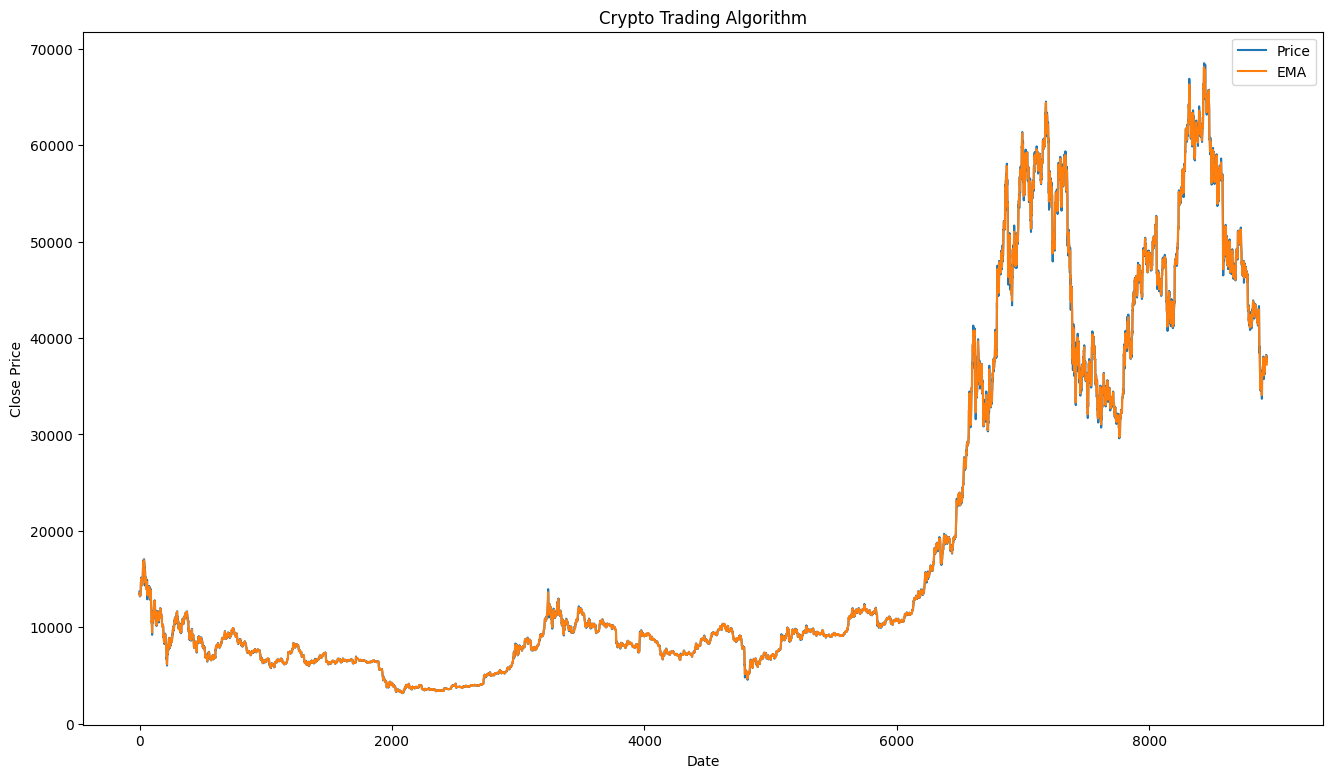

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(df.index, df['open'], label='Price')
ax.plot(df.index, df['ema'], label='EMA')


plt.title('Crypto Trading Algorithm')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.savefig("ema.png")
plt.show()


In [ ]:
#creating ARIMA model for predicting stock prices
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf,pacf, adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

def determine_p_d_q_values(timeseries,lags):
    autocorr_values = acf(timeseries,nlags = lags)
    pacf_values = pacf(timeseries,nlags = lags)

    p_value = 0
    for i in range(1,len(autocorr_values)):
        if (abs(autocorr_values[i]) > 1.96 / len(timeseries)**0.5):
            p_value = i
            break

    d_value = 0
    p_value_adf = adfuller(timeseries)[1]
    while p_value_adf > 0.05:
        timeseries = np.diff(timeseries)
        d_value += 1
        p_value_adf = adfuller(timeseries)[1]

    q_value = 0
    for i in range(1,len(pacf_values)):
        if (abs(pacf_values[i]) > 1.96 / len(timeseries)**0.5):
            q_value = i
            break

    return p_value,d_value,q_value